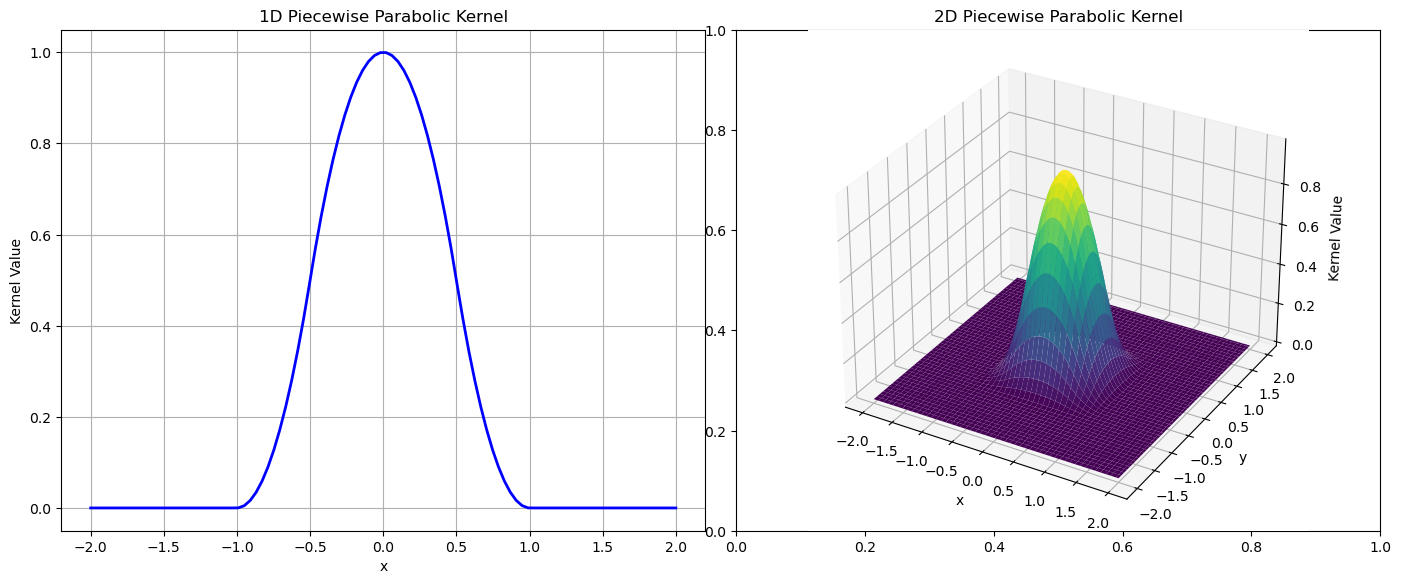

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def piecewise_parabolic_kernel_1d(x, sigma_kernel):
    """Piecewise Parabolic Kernel function in 1D."""
    if x <= -sigma_kernel or x >= sigma_kernel:
        return 0.0
    elif x <= -0.5 * sigma_kernel:
        kernel_value = 1.0 + x / sigma_kernel
        kernel_value = kernel_value**2
        kernel_value = 2.0 * kernel_value / sigma_kernel
    elif x >= 0.5 * sigma_kernel:
        kernel_value = 1.0 - x / sigma_kernel
        kernel_value = kernel_value**2
        kernel_value = 2.0 * kernel_value / sigma_kernel
    else:
        kernel_value = x / sigma_kernel
        kernel_value = kernel_value**2
        kernel_value = 1.0 - 2.0 * kernel_value
        kernel_value = kernel_value / sigma_kernel
    return kernel_value

def piecewise_parabolic_kernel_2d(x, y, sigma_kernel):
    """Piecewise Parabolic Kernel function in 2D."""
    kernel_x = piecewise_parabolic_kernel_1d(x, sigma_kernel)
    kernel_y = piecewise_parabolic_kernel_1d(y, sigma_kernel)
    return kernel_x * kernel_y

# Define parameters
sigma_kernel = 1.0

# 1D Kernel
x_1d = np.linspace(-2*sigma_kernel, 2*sigma_kernel, 100)
kernel_1d = np.array([piecewise_parabolic_kernel_1d(xi, sigma_kernel) for xi in x_1d])

# 2D Kernel
x_2d = np.linspace(-2*sigma_kernel, 2*sigma_kernel, 100)
y_2d = np.linspace(-2*sigma_kernel, 2*sigma_kernel, 100)
X_2d, Y_2d = np.meshgrid(x_2d, y_2d)
kernel_2d = np.array([[piecewise_parabolic_kernel_2d(xi, yi, sigma_kernel) for xi in x_2d] for yi in y_2d])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1D Kernel
axs[0].plot(x_1d, kernel_1d, color='blue', lw=2)
axs[0].set_title("1D Piecewise Parabolic Kernel")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Kernel Value")
axs[0].grid(True)

# Plot 2D Kernel
ax2d = fig.add_subplot(122, projection='3d')
ax2d.plot_surface(X_2d, Y_2d, kernel_2d, cmap='viridis')
ax2d.set_title("2D Piecewise Parabolic Kernel")
ax2d.set_xlabel("x")
ax2d.set_ylabel("y")
ax2d.set_zlabel("Kernel Value")

plt.tight_layout()
plt.show()


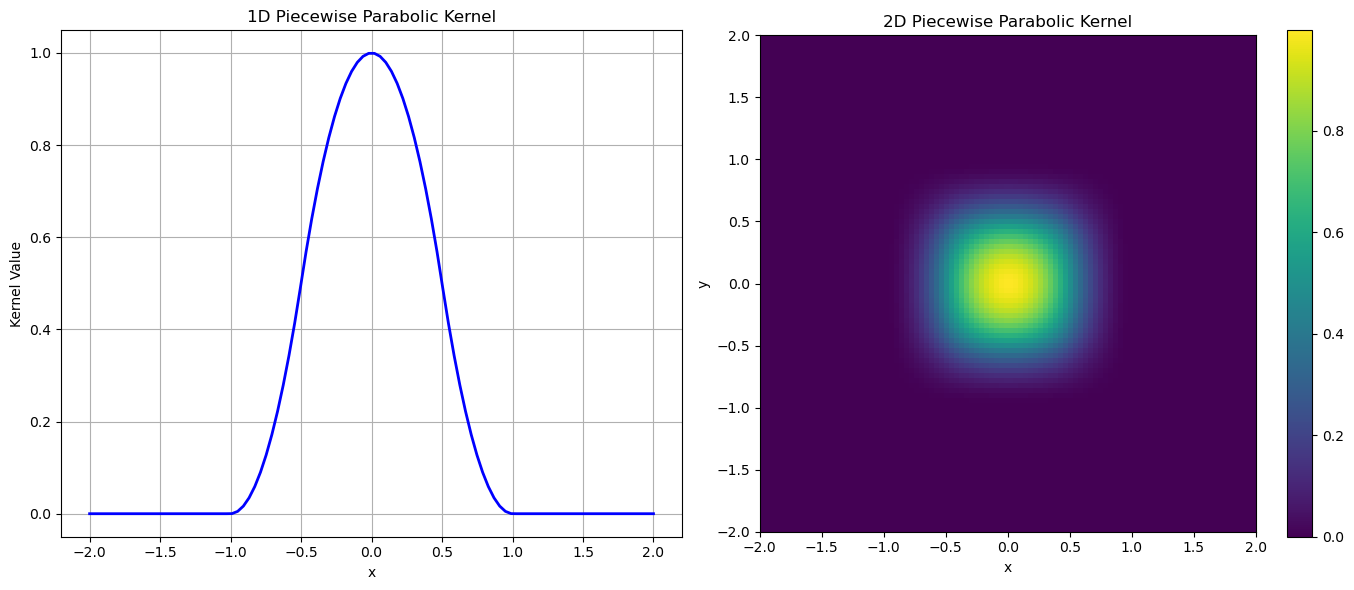

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def piecewise_parabolic_kernel_1d(x, sigma_kernel):
    """Piecewise Parabolic Kernel function in 1D."""
    if x <= -sigma_kernel or x >= sigma_kernel:
        return 0.0
    elif x <= -0.5 * sigma_kernel:
        kernel_value = 1.0 + x / sigma_kernel
        kernel_value = kernel_value**2
        kernel_value = 2.0 * kernel_value / sigma_kernel
    elif x >= 0.5 * sigma_kernel:
        kernel_value = 1.0 - x / sigma_kernel
        kernel_value = kernel_value**2
        kernel_value = 2.0 * kernel_value / sigma_kernel
    else:
        kernel_value = x / sigma_kernel
        kernel_value = kernel_value**2
        kernel_value = 1.0 - 2.0 * kernel_value
        kernel_value = kernel_value / sigma_kernel
    return kernel_value

def piecewise_parabolic_kernel_2d(x, y, sigma_kernel):
    """Piecewise Parabolic Kernel function in 2D."""
    kernel_x = piecewise_parabolic_kernel_1d(x, sigma_kernel)
    kernel_y = piecewise_parabolic_kernel_1d(y, sigma_kernel)
    return kernel_x * kernel_y

# Define parameters
sigma_kernel = 1.0

# 1D Kernel
x_1d = np.linspace(-2 * sigma_kernel, 2 * sigma_kernel, 100)
kernel_1d = np.array([piecewise_parabolic_kernel_1d(xi, sigma_kernel) for xi in x_1d])

# 2D Kernel
x_2d = np.linspace(-2 * sigma_kernel, 2 * sigma_kernel, 100)
y_2d = np.linspace(-2 * sigma_kernel, 2 * sigma_kernel, 100)
X_2d, Y_2d = np.meshgrid(x_2d, y_2d)
kernel_2d = np.array([[piecewise_parabolic_kernel_2d(xi, yi, sigma_kernel) for xi in x_2d] for yi in y_2d])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1D Kernel
axs[0].plot(x_1d, kernel_1d, color='blue', lw=2)
axs[0].set_title("1D Piecewise Parabolic Kernel")
axs[0].set_xlabel("x")
axs[0].set_ylabel("Kernel Value")
axs[0].grid(True)

# Plot 2D Kernel as a heatmap
c = axs[1].imshow(kernel_2d, extent=[-2 * sigma_kernel, 2 * sigma_kernel, -2 * sigma_kernel, 2 * sigma_kernel],
                  origin='lower', cmap='viridis')
axs[1].set_title("2D Piecewise Parabolic Kernel")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
fig.colorbar(c, ax=axs[1])

plt.tight_layout()
plt.show()


Integral of the Piecewise Parabolic kernel for dx=0.025: 24448.4496


/tmp/ipykernel_2904418/1657550226.py:94: RuntimeWarning: invalid value encountered in log
  potential_array_conv = -np.log(boltz_array_conv)


Integral of the Piecewise Parabolic kernel for dx=0.05: 24457.8321
Integral of the Piecewise Parabolic kernel for dx=0.075: 24441.782434948247
Integral of the Piecewise Parabolic kernel for dx=0.1: 24479.731600000003
Integral of the Piecewise Parabolic kernel for dx=0.15: 24489.892841165976


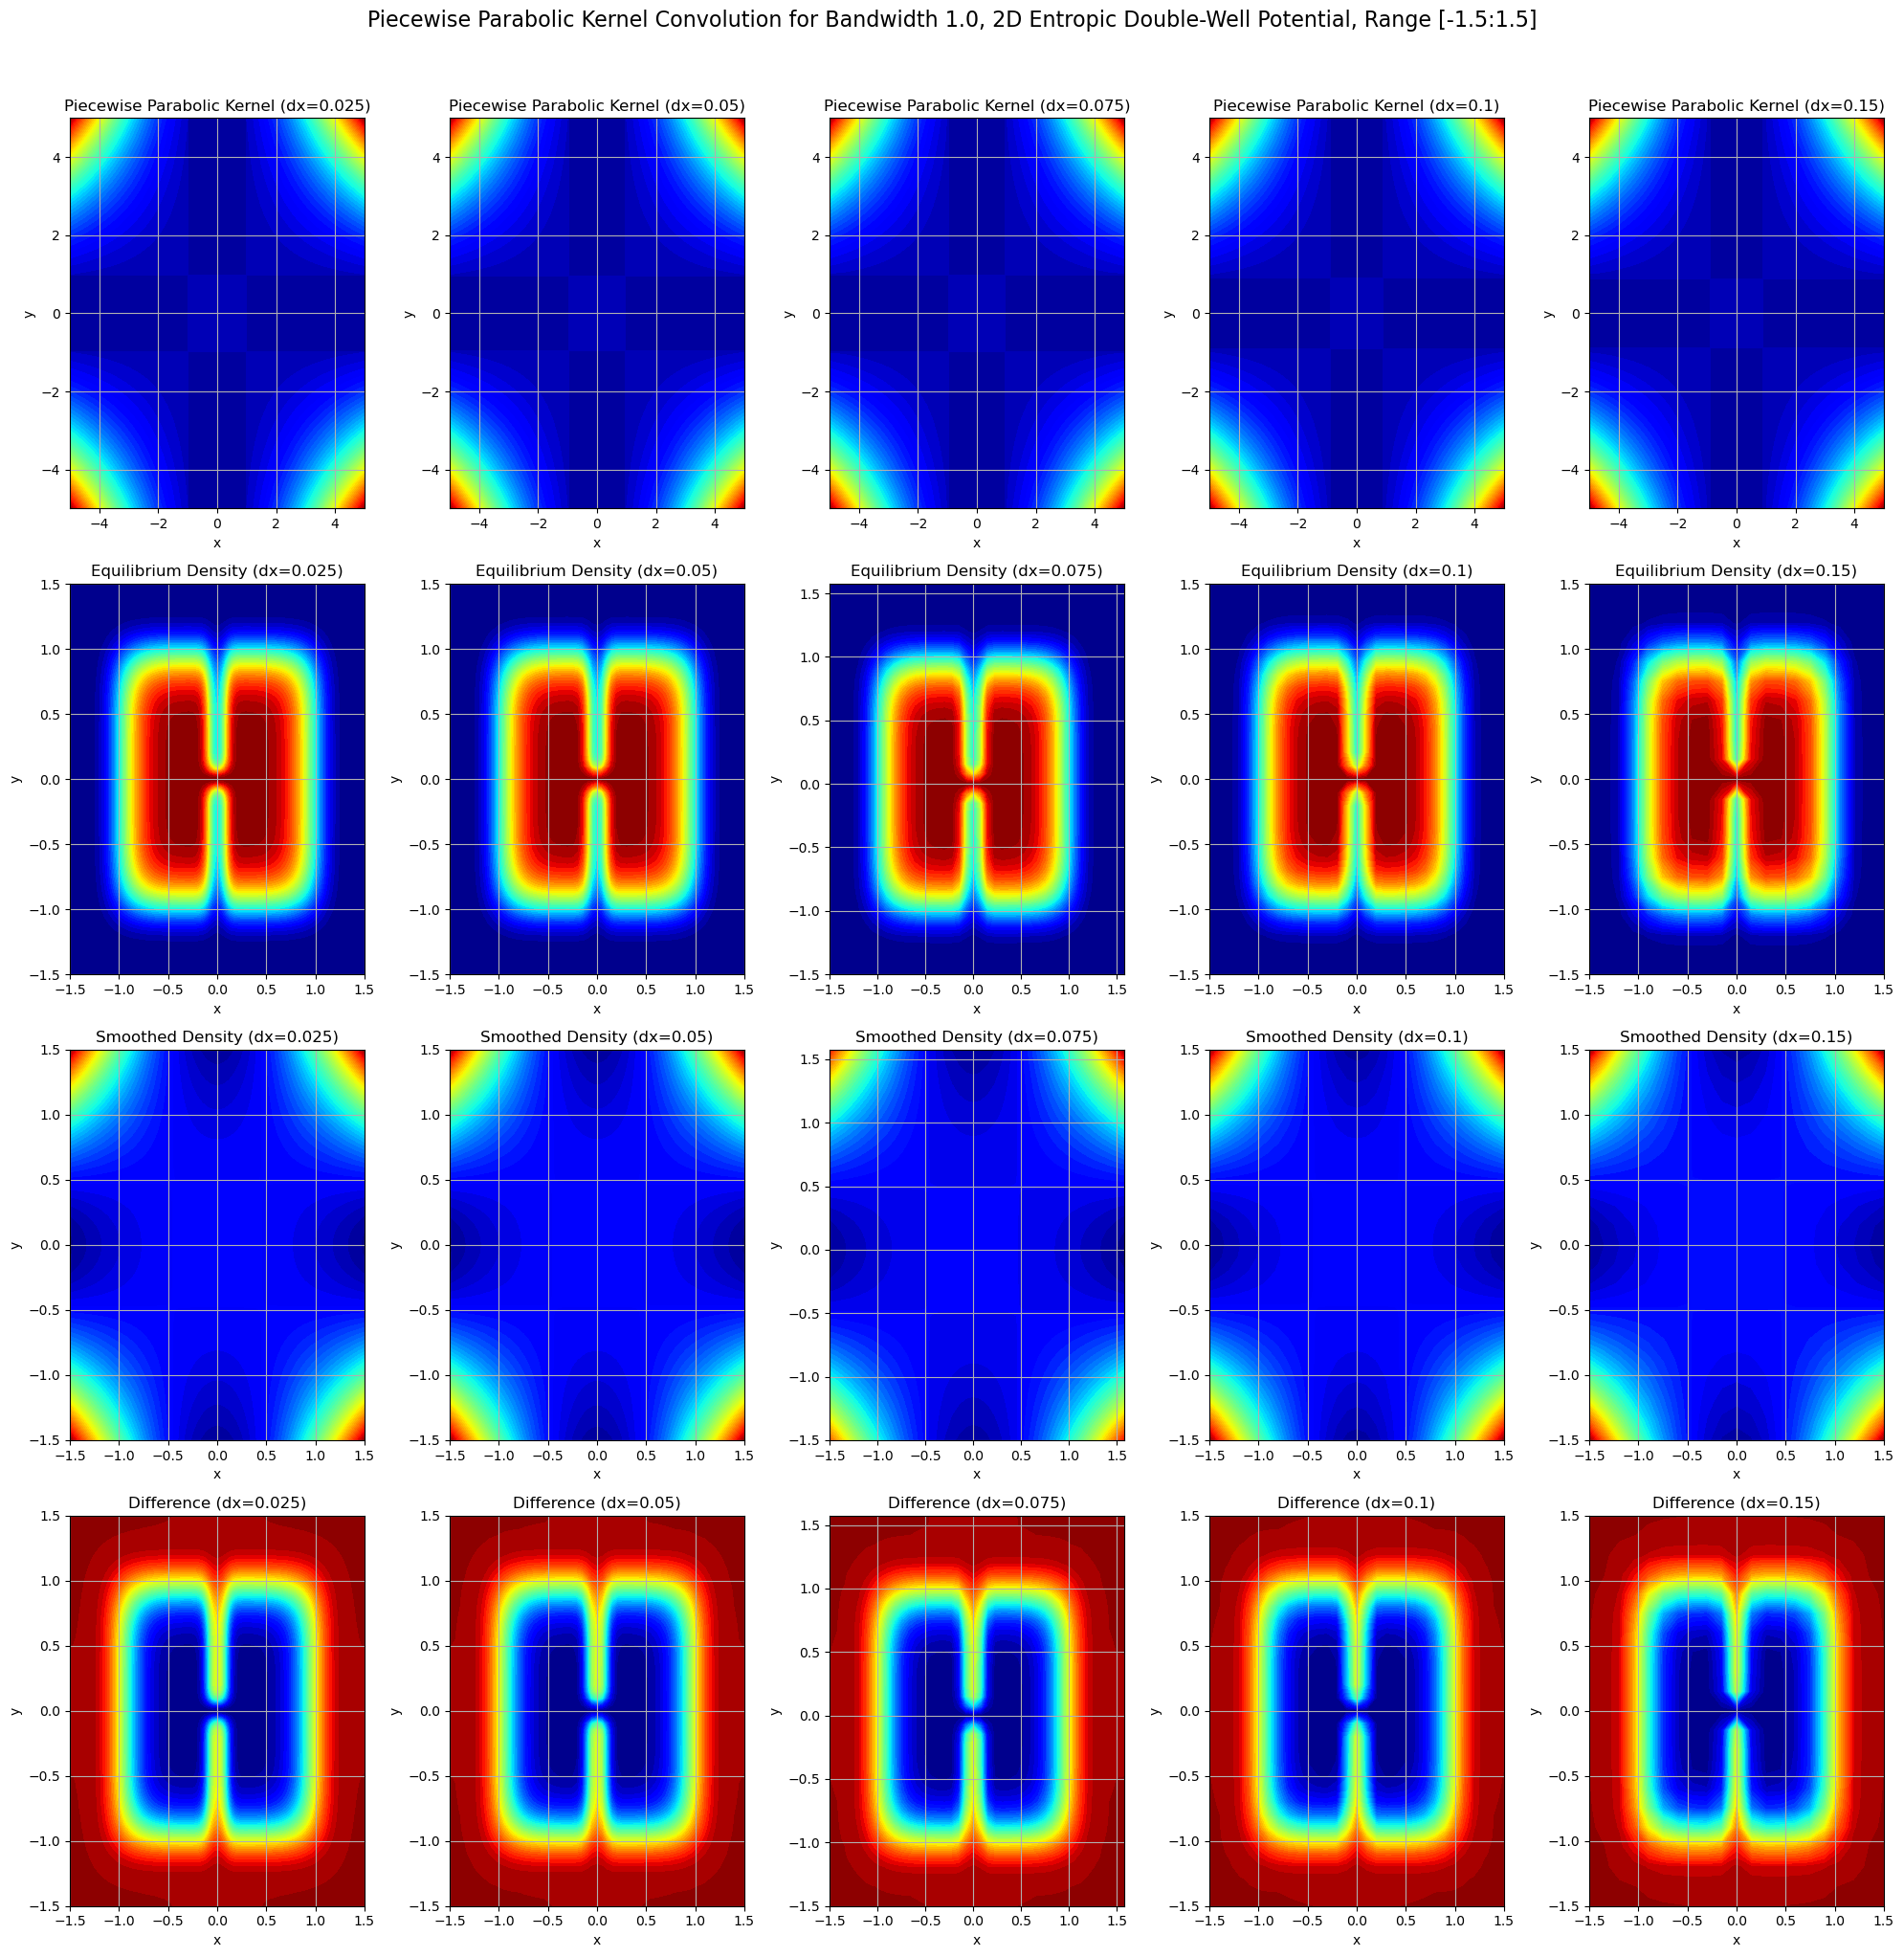

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 2D Potential Function
def V(x, y, sigma_x=0.1, sigma_y=0.1, A=8.0, a=1.0):
    """Computes the 2D potential function."""
    return a * (x**6 + y**6 + np.exp(-(x/sigma_x)**2) * (1 - np.exp(-(y/sigma_y)**2)))

def piecewise_parabolic_kernel(x, sigma_kernel):
    """Piecewise Parabolic Kernel function for 1D."""
    kernel_value = np.zeros_like(x)
    mask1 = (x > -sigma_kernel) & (x <= -0.5 * sigma_kernel)
    mask2 = (x >= 0.5 * sigma_kernel) & (x < sigma_kernel)
    mask3 = ~mask1 & ~mask2
    
    kernel_value[mask1] = 2.0 * ((1.0 + x[mask1] / sigma_kernel) ** 2) / sigma_kernel
    kernel_value[mask2] = 2.0 * ((1.0 - x[mask2] / sigma_kernel) ** 2) / sigma_kernel
    kernel_value[mask3] = (1.0 - 2.0 * (x[mask3] / sigma_kernel) ** 2) / sigma_kernel
    
    return kernel_value

def piecewise_parabolic_kernel_2d(x, y, sigma_kernel):
    """Piecewise Parabolic Kernel function for 2D."""
    kernel_x = piecewise_parabolic_kernel(x, sigma_kernel)
    kernel_y = piecewise_parabolic_kernel(y, sigma_kernel)
    return np.outer(kernel_y, kernel_x)

def convolve_density_2d(boltz_array, kernel_array, dx, dy):
    """Perform 2D convolution on the density array manually."""
    boltz_array_conv = np.zeros_like(boltz_array)
    kernel_half_x = (kernel_array.shape[0] - 1) // 2
    kernel_half_y = (kernel_array.shape[1] - 1) // 2
    
    # Iterate over each pixel in the boltz_array
    for i in range(boltz_array.shape[0]):
        for j in range(boltz_array.shape[1]):
            # Iterate over each pixel in the kernel
            for m in range(kernel_array.shape[0]):
                for n in range(kernel_array.shape[1]):
                    i_shift = i - kernel_half_x + m
                    j_shift = j - kernel_half_y + n
                    # Check if the shifted position is within the bounds
                    if 0 <= i_shift < boltz_array.shape[0] and 0 <= j_shift < boltz_array.shape[1]:
                        boltz_array_conv[i, j] += boltz_array[i_shift, j_shift] * kernel_array[m, n] * dx * dy

    return boltz_array_conv

def plot_results_2d(lattice_spacings, sigma_kernel, x_min, x_max, y_min, y_max):
    num_plots = len(lattice_spacings)
    fig, axs = plt.subplots(4, num_plots, figsize=(20, 20))
    
    # Set the figure background color to white
    fig.patch.set_facecolor('white')
    
    # Set the background color of all axes to white
    for ax in axs.flat:
        ax.set_facecolor('white')

    for i, dx in enumerate(lattice_spacings):
        dy = dx  # Assuming square grid
        x = np.arange(x_min, x_max + dx, dx)
        y = np.arange(y_min, y_max + dy, dy)
        X, Y = np.meshgrid(x, y)
        potential_array = V(X, Y)
        boltz_array = np.exp(-potential_array)
        
        # Normalize the Boltzmann density
        boltz_array /= np.trapz(np.trapz(boltz_array, y, axis=0), x, axis=0)
        
        # Kernel and its convolution
        kernel_size = int(5 * sigma_kernel)  # Approximate size
        npoints_kernel_x = int((kernel_size - 0.1 * dx) / dx) + 1
        npoints_kernel_x = 2 * npoints_kernel_x + 1  # Ensure odd number
        kernel_x = np.linspace(-kernel_size, kernel_size, npoints_kernel_x)
        
        npoints_kernel_y = int((kernel_size - 0.1 * dy) / dy) + 1
        npoints_kernel_y = 2 * npoints_kernel_y + 1  # Ensure odd number
        kernel_y = np.linspace(-kernel_size, kernel_size, npoints_kernel_y)
        
        Kernel_X, Kernel_Y = np.meshgrid(kernel_x, kernel_y)
        kernel_array = piecewise_parabolic_kernel_2d(kernel_x, kernel_y, sigma_kernel)
        
        # Normalize the kernel
        kernel_integral = np.trapz(np.trapz(kernel_array, kernel_y, axis=0), kernel_x)
        kernel_array /= kernel_integral
        
        # Print the integral of the kernel to check if it is equal to one
        print(f'Integral of the Piecewise Parabolic kernel for dx={dx}: {kernel_integral}')
        
        boltz_array_conv = convolve_density_2d(boltz_array, kernel_array, dx, dy)
        
        # Calculate potential from convolved density
        with np.errstate(divide='ignore'):
            potential_array_conv = -np.log(boltz_array_conv)
        
        # Plot Piecewise Parabolic Kernel
        axs[0, i].contourf(Kernel_X, Kernel_Y, kernel_array, levels=50, cmap='jet')
        axs[0, i].set_xlabel('x')
        axs[0, i].set_ylabel('y')
        axs[0, i].set_title(f'Piecewise Parabolic Kernel (dx={dx})')
        axs[0, i].grid(True)
        
        # Plot Equilibrium Density
        axs[1, i].contourf(X, Y, boltz_array, levels=50, cmap='jet')
        axs[1, i].set_xlabel('x')
        axs[1, i].set_ylabel('y')
        axs[1, i].set_title(f'Equilibrium Density (dx={dx})')
        axs[1, i].grid(True)
        
        # Plot Smoothed Density
        axs[2, i].contourf(X, Y, boltz_array_conv, levels=50, cmap='jet')
        axs[2, i].set_xlabel('x')
        axs[2, i].set_ylabel('y')
        axs[2, i].set_title(f'Smoothed Density (dx={dx})')
        axs[2, i].grid(True)
        
        # Compute and Plot Difference between Densities
        density_difference = boltz_array_conv - boltz_array
        axs[3, i].contourf(X, Y, density_difference, levels=50, cmap='jet')
        axs[3, i].set_xlabel('x')
        axs[3, i].set_ylabel('y')
        axs[3, i].set_title(f'Difference (dx={dx})')
        axs[3, i].grid(True)
        
    # Add a main title to the figure
    fig.suptitle('Piecewise Parabolic Kernel Convolution for Bandwidth 1.0, 2D Entropic Double-Well Potential, Range [-1.5:1.5]', fontsize=16, y=1.02)
    
    # Adjust layout and save the plot
    plt.tight_layout()
    plt.savefig('PPK_2d_jet_bw1.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

if __name__ == "__main__":
    lattice_spacings = [0.025, 0.05, 0.075, 0.1, 0.15]  # Finer lattice spacings for 2D
    sigma_kernel = 1.0  # Fixed bandwidth for Piecewise Parabolic kernel
    x_min, x_max = -1.5, 1.5  # Range in x direction
    y_min, y_max = -1.5, 1.5  # Range in y direction
    plot_results_2d(lattice_spacings, sigma_kernel, x_min, x_max, y_min, y_max)
